# 세미프로젝트 1-3

## 서울시 공공 자전거 연관 키워드 시각화

### 1. 데이터 전처리

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
df_keywords1 = pd.read_csv('따릉이_Youtube_keywords.csv', encoding='cp949')
df_keywords2 = pd.read_csv('따릉이_brunch_keywords.csv', encoding='cp949')
df_keywords3 = pd.read_csv('따릉이_hashtag_keywords.csv', encoding='cp949')
df_keywords4 = pd.read_csv('따릉이_naver_keywords.csv', encoding='cp949')
df_keywords5 = pd.read_csv('따릉이_google_keywords.csv', encoding='cp949')

In [6]:
# 크롤링 data 수합

df_all = pd.concat([df_keywords1,df_keywords2,df_keywords3,df_keywords4,df_keywords5])  #concat함수로 각각의 데이터프레임을 붙여줌
df_all.to_csv('따릉이_Keywords.csv', encoding='utf-8', index=False)

In [7]:
df_final = pd.read_csv('따릉이_Keywords.csv', encoding='utf-8')

df_final.head()

,Title
0,( 구블로그#02 ? ) 서울에서 따릉이 타고 논 VLOG(브이로그) / 따릉이 대...
1,Vlog. 4월 마지막 주 브이로그.따릉이타고 한강라이딩! 갈릭버터파스타도해먹고 여...
2,[VLOG] 일상 브이로그 | 직장인 브이로그 | 언박싱｜늦잠지옥｜주말치팅(?)｜뮤...
3,"[퇴근후 브이로그] 더키버니랑 함께, 따릉이 첫도전!"
4,Eng | 브이로그 | 요즘읽는 책 | 트렌치자켓 | 뮤지컬 팬텀 | 따릉이 | 건...


In [8]:
# 수합한 자료 토큰화, 일부 단어 삭제

from collections import Counter
from konlpy.tag import Twitter

keywords = df_final['Title'].tolist()
keywords = ''.join(keywords)   #리스트 내 매개변수를 문자열로 합쳐서 변환

twitter = Twitter()
raw_pos_tagged = twitter.pos(keywords, norm=True, stem=True)   #품사 태깅

del_list = ['따릉', '자전거', '타고', '따다', '브이', '로그', '하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
            
word_counted = Counter(word_cleaned) # Counter함수로 리스트에 동일한 값의 자료가 몇개인지를 파악
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('한강', 474),
 ('서울', 464),
 ('서울시', 329),
 ('따릉이', 305),
 ('방법', 289),
 ('나들이', 259),
 ('일상', 214),
 ('공공', 203),
 ('이용', 196),
 ('라이딩', 186),
 ('타다', 186),
 ('후기', 177),
 ('이준석', 169),
 ('대여', 150),
 ('VLOG', 140),
 ('출근', 135),
 ('뉴스', 133),
 ('가다', 132),
 ('QR', 132),
 ('반납', 132),
 ('용법', 128),
 ('보다', 115),
 ('공원', 97),
 ('코스', 92),
 ('여행', 91),
 ('알다', 89),
 ('vlog', 88),
 ('꿀팁', 80),
 ('공유', 78),
 ('대다', 76),
 ('리뷰', 75),
 ('없다', 75),
 ('Vlog', 74),
 ('남산', 74),
 ('카페', 73),
 ('배달', 69),
 ('직장인', 66),
 ('Seoul', 63),
 ('이유', 63),
 ('좋다', 61),
 ('주말', 60),
 ('한요', 56),
 ('데이트', 55),
 ('feat', 54),
 ('안장', 53),
 ('따릉이타', 52),
 ('MBN', 52),
 ('퇴근', 51),
 ('가지', 50),
 ('사람', 50),
 ('TV', 50),
 ('영상', 48),
 ('추천', 46),
 ('새싹따릉', 46),
 ('빌리다', 46),
 ('전기자전거', 45),
 ('제로', 45),
 ('초보', 44),
 ('다이어트', 44),
 ('가을', 44),
 ('페이', 44),
 ('먹다', 42),
 ('운동', 42),
 ('국토', 41),
 ('MBC', 41),
 ('사용', 41),
 ('이야기', 41),
 ('가보다', 40),
 ('드리다', 40),
 ('달다', 38),
 ('최고', 38),
 ('함께', 37),
 ('릉이따릉',

In [10]:
#빈출단어확인

df_sorted_word = pd.DataFrame(sorted_word_dic)
df_sorted_word.head(10)

,0,1
0,한강,474
1,서울,464
2,서울시,329
3,따릉이,305
4,방법,289
5,나들이,259
6,일상,214
7,공공,203
8,이용,196
9,라이딩,186


In [11]:
# 키워드 그룹화

keyword_dict = {'한강':['한강', '뚝섬', '반포', '잠수교', '대교', '여의도', '잠수교', '잠실', '잠수교', '성수동'],
                '나들이':['천', '공원', '여행', '데이트', '숲', '라이딩', '벚꽃', '투어', '코스', '산', 'Vlog', '카페', '주말', '맛집', '날씨', '유원지', '힐링', '신혼부부', '커플', '청계천', '남산'],
                '출퇴근':['출근', '퇴근', ' 출퇴근', '직장인'], '운동':['운동', '국토', '종주'], '공유자전거':['카카오', '공유자전거', '대여', '전기자전거', '공공'],
                '따릉이':['따릉이', '자전거'], '방법':{'방법', '이용', '대여', '후기', '반납'}}

result_tag_list = {"한강" : 0, "나들이" : 0, "운동" : 0, "출퇴근" : 0, "공유자전거" : 0, "따릉이" : 0,"방법" : 0}
for tag in word_cleaned:
    for key in keyword_dict: # key == '한강' -> '나들이' -> ...
        for keyword in keyword_dict[key]: # ['한강', '뚝섬', '반포'] -> keyword : '한강' ->'뚝섬' ->'반포'
            if keyword in tag:
                result_tag_list[key] += 1

result_tag_list

{'한강': 678,
 '나들이': 1499,
 '운동': 117,
 '출퇴근': 306,
 '공유자전거': 438,
 '따릉이': 501,
 '방법': 951}

### 2. 연관 키워드 시각화

#### 2-1 Word Cloud 시각화

In [12]:
!pip install Pillow==5.4.1

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
        
                       width=2000, height=1000, # 워드클라우드 크기, 해상도 변경
                       prefer_horizontal= 1.0,
                       background_color='white')

In [15]:
word_cloud.generate_from_frequencies(word_dic)

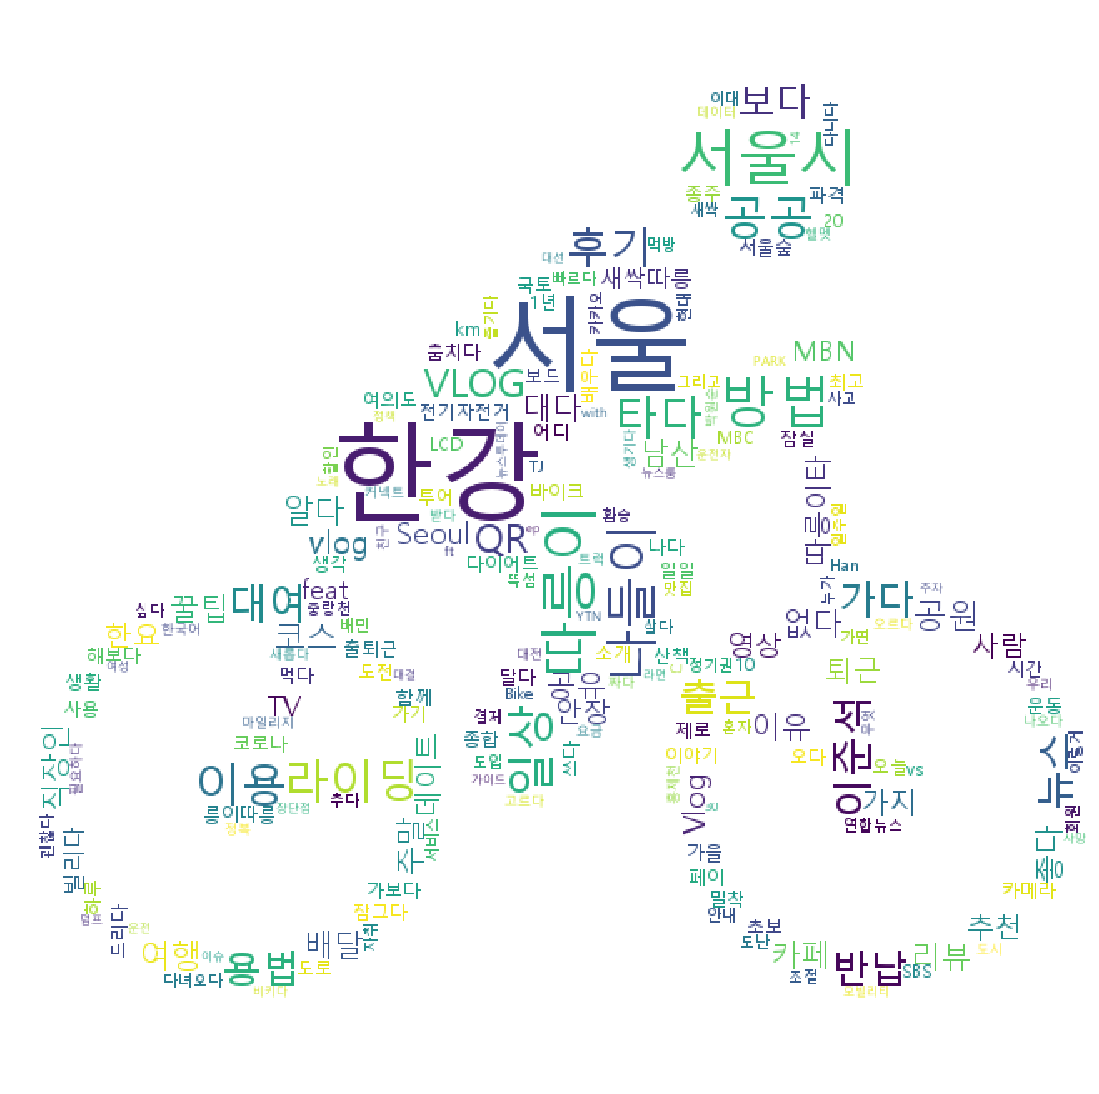

In [16]:
youtube_coloring = np.array(Image.open("bicycle.png"))    #자전거 이미지 파일을 오픈한 후, 배열구조로 변환

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000, 
                       mask=youtube_coloring,    #불러온 이미지에 마스킹
                       background_color='white').generate_from_frequencies(word_dic)


plt.figure(figsize=(15,15))             #이미지 출력 및 저장
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### 2-2 그래프 시각화 - barplot

In [17]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

In [18]:
df_result_tag_list = pd.DataFrame(list(result_tag_list.values()), result_tag_list.keys())
result = df_result_tag_list.sort_values([0], ascending=False)    #결과값 내림차순으로 정리

result

,0
나들이,1499
방법,951
한강,678
따릉이,501
공유자전거,438
출퇴근,306
운동,117


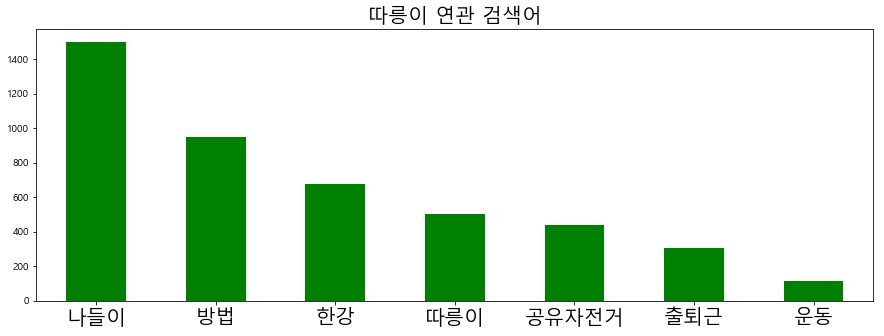

In [31]:
result.plot(kind='bar', legend=False, figsize=(15,5), color='green')     #결과값을 'bar그래프'형식으로 변환


plt.title('따릉이 연관 검색어', fontsize=20)
plt.xticks(fontsize=20, rotation=0)
plt.show()